In [2]:
import pandas as pd

# Read the CSV file with semicolon as the delimiter
df = pd.read_csv("/Users/ulrike_imac_air/projects/DataScienceProjects/tech_layoffs_project/tech_layoffs_csv/layoffs_location_with_coordinates.csv", sep=';')

# Display the first few rows to verify that the file is read correctly
display(df.head())
display(df.info(verbose=True))

location_HQ                  Region       State      Country  \
0      Adelaide                     NaN         NaN    Australia   
1  Agoura Hills                     NaN  California          USA   
2     Ahmedabad                     NaN         NaN        India   
3       Alameda  San Francisco Bay Area  California          USA   
4     Amsterdam                     NaN         NaN  Netherlands   

       Continent     latitude     longitude  
0         Oceana  -34,9281805   138,5999312  
1  North America   34,1479100  -118,7657042  
2           Asia   23,0216238    72,5797068  
3  North America   37,6090291  -121,8991420  
4         Europe   52,3730796     4,8924534

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   location_HQ  218 non-null    object
 1   Region       35 non-null     object
 2   State        116 non-null    object
 3   Country      218 non-null    object
 4   Continent    218 non-null    object
 5   latitude     218 non-null    object
 6   longitude    218 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


None

I will use a Python geopy library to get the coordinates:

In [4]:
%pip install geopy


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
from geopy.geocoders import Nominatim
from typing import Tuple
from functools import lru_cache
import time

geolocator = Nominatim(user_agent="Python3.12")

@lru_cache(maxsize=None)
def get_coord_lat_lon(location_HQ: str, Country: str = None) -> Tuple[float, float]:
    """ Get coordinates for Cities """
    if Country:
        location = geolocator.geocode(location_HQ + ', ' + Country)
    else:
        location = geolocator.geocode(location_HQ)
    return (location.latitude, location.longitude) if location else (None, None)

# Assuming 'df' is your DataFrame and it has 'location_HQ' and 'Country' columns
# Create empty lists to store latitude and longitude
latitudes = []
longitudes = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    location_HQ = row['location_HQ']
    Country = row.get('Country')  # Use get to avoid KeyError if 'Country' might be missing

    lat, lon = get_coord_lat_lon(location_HQ, Country)
    if lat is not None and lon is not None:
        latitudes.append(lat)
        longitudes.append(lon)
    else:
        latitudes.append(None)
        longitudes.append(None)
    
    # Respect Nominatim's usage policy and avoid making too many requests in a short period
    time.sleep(1)  # Sleep for 1 second

# Add latitude and longitude columns to the DataFrame
df['latitude'] = latitudes
df['longitude'] = longitudes

# Display the DataFrame with latitude and longitude columns
print(df.head())


GeocoderTimedOut: Service timed out

In [5]:
display(df.head())

location_HQ                  Region       State      Country   latitude  \
0      Adelaide                     NaN         NaN    Australia -34.928181   
1  Agoura Hills  San Francisco Bay Area  California          USA  34.147910   
2     Ahmedabad                     NaN         NaN        India  23.021624   
3       Alameda  San Francisco Bay Area  California          USA  37.609029   
4     Amsterdam                     NaN         NaN  Netherlands  52.373080   

    longitude  
0  138.599931  
1 -118.765704  
2   72.579707  
3 -121.899142  
4    4.892453

In [6]:
df.to_csv('layoffs_location_with_coordinates.csv', index=False)

In [7]:
# Assuming 'df' is your DataFrame containing latitude and longitude columns
df.to_csv('/Users/ulrike_imac_air/projects/DataScienceProjects/tech_layoffs_project/tech_layoffs_csv/layoffs_location_with_coordinates.csv', index=False)

display(df.head())
display(df.info(verbose=True))

location_HQ                  Region       State      Country   latitude  \
0      Adelaide                     NaN         NaN    Australia -34.928181   
1  Agoura Hills  San Francisco Bay Area  California          USA  34.147910   
2     Ahmedabad                     NaN         NaN        India  23.021624   
3       Alameda  San Francisco Bay Area  California          USA  37.609029   
4     Amsterdam                     NaN         NaN  Netherlands  52.373080   

    longitude  
0  138.599931  
1 -118.765704  
2   72.579707  
3 -121.899142  
4    4.892453

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   location_HQ  198 non-null    object 
 1   Region       31 non-null     object 
 2   State        31 non-null     object 
 3   Country      198 non-null    object 
 4   latitude     195 non-null    float64
 5   longitude    195 non-null    float64
dtypes: float64(2), object(4)
memory usage: 9.4+ KB


None

In [8]:
import folium
from branca.element import Figure

# Create a Figure object
fig = Figure(width=1024, height=600)

# Create a Folium Map object covering the whole world
fmap = folium.Map(location=[0, 0], tiles="openstreetmap", zoom_start=2)

# Filter out rows with NaN latitude or longitude
df_filtered = df.dropna(subset=['latitude', 'longitude'])

# Iterate over each row in the filtered DataFrame
for index, row in df_filtered.iterrows():
    latitude, longitude = row['latitude'], row['longitude']
    name = row["location_HQ"] 
    # Add marker to the map
    folium.Marker(location=[latitude, longitude], popup=name).add_to(fmap)

# Add the Folium Map object to the Figure
fig.add_child(fmap)

# Display the Figure
display(fig)



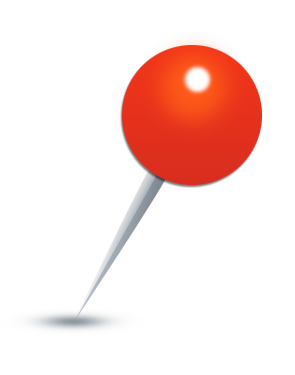
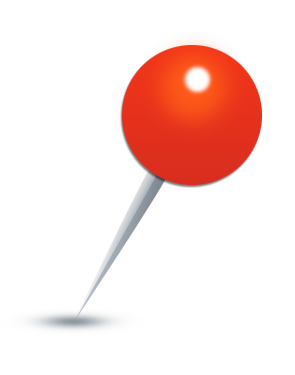
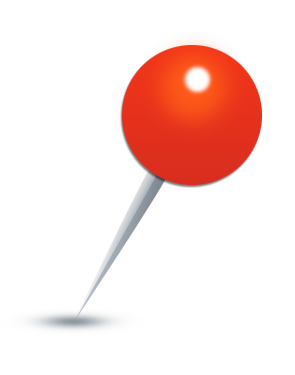
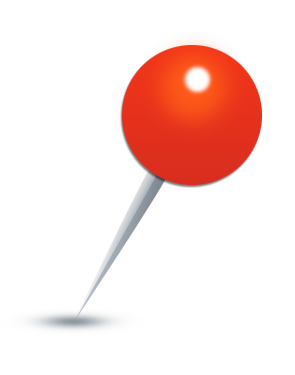
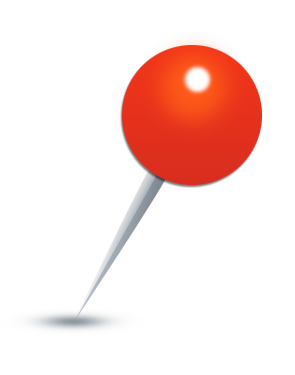
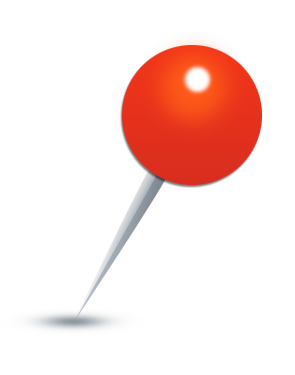
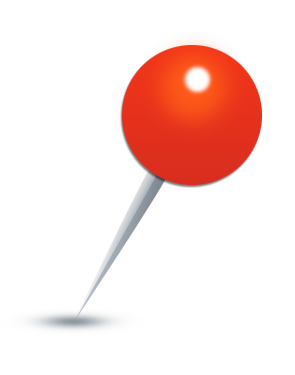
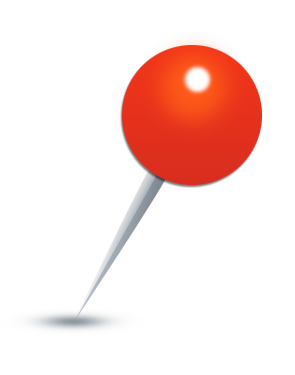
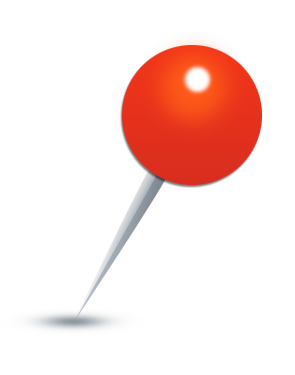
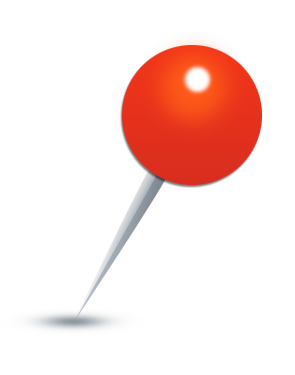
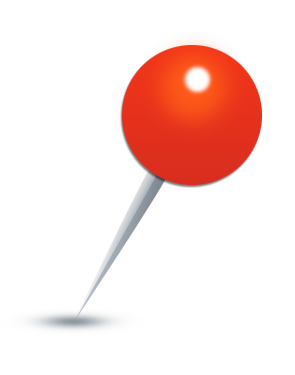
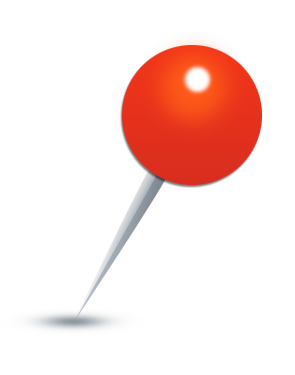
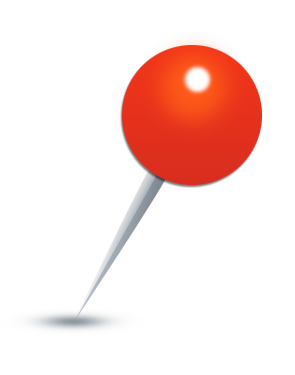
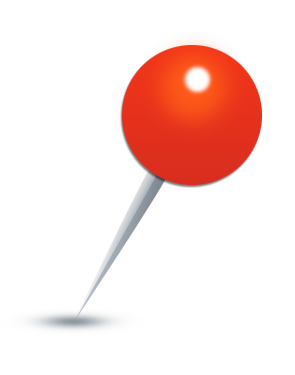
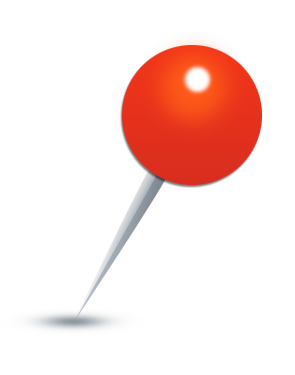
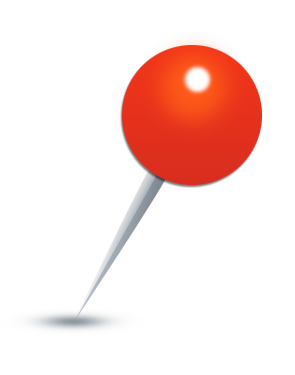
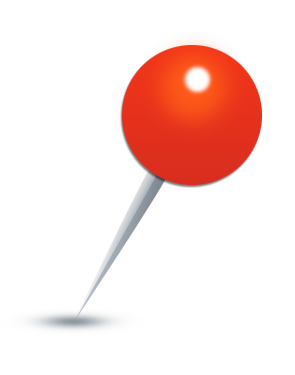
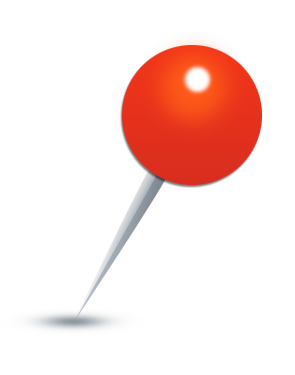
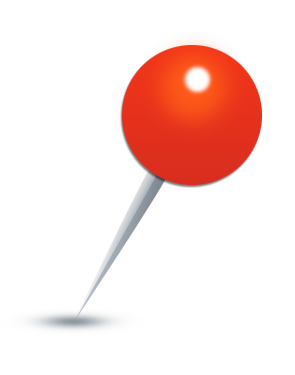
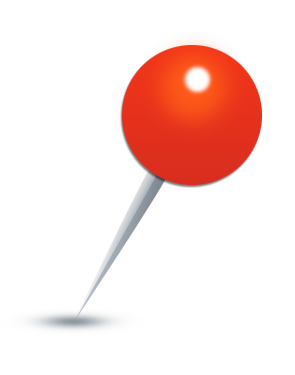
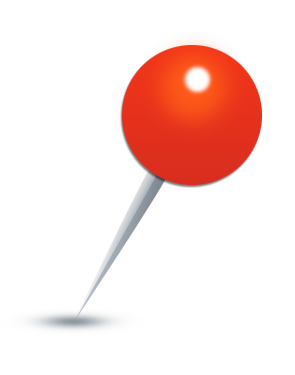
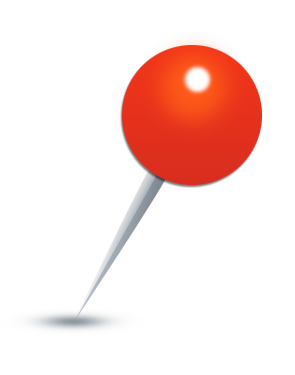
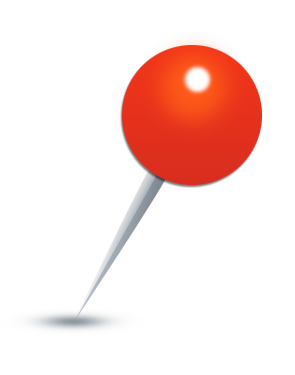
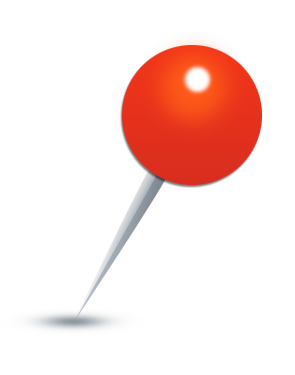
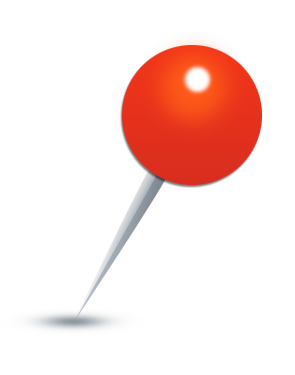
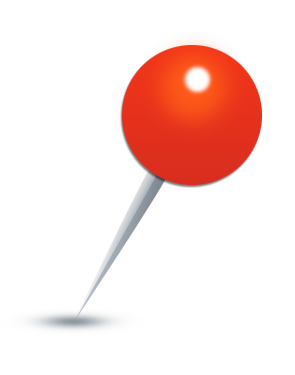
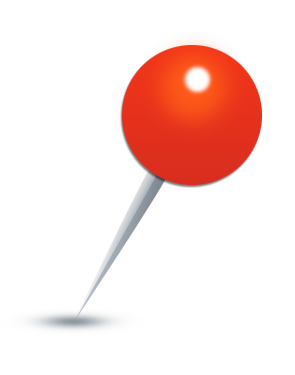
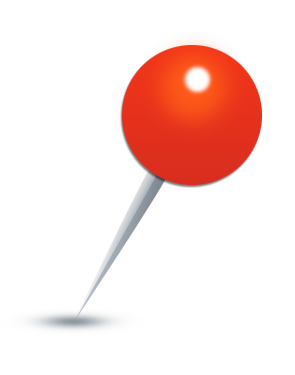
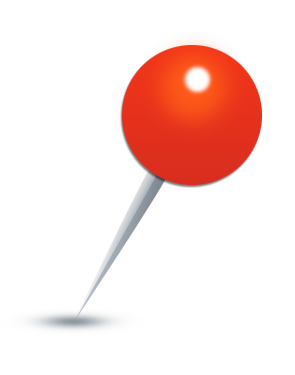
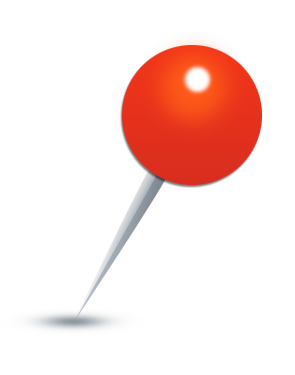
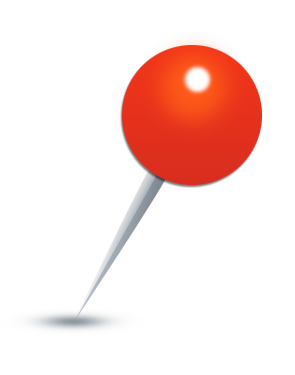
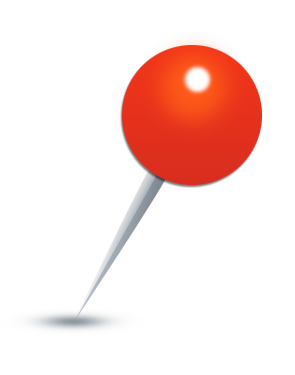
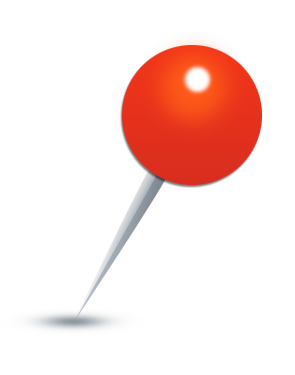
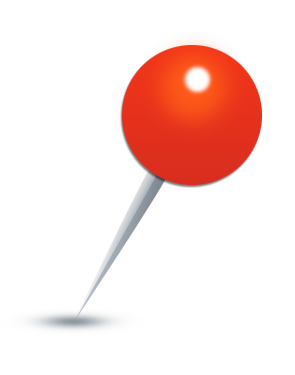
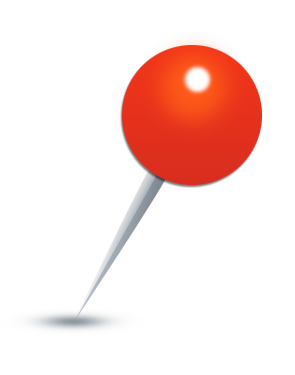
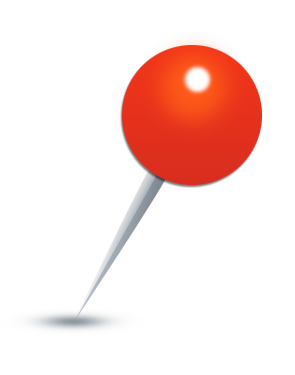
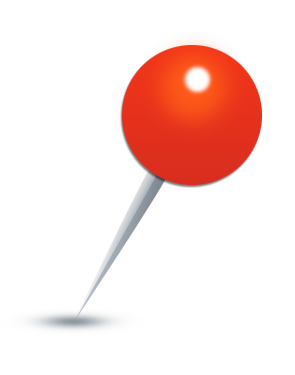
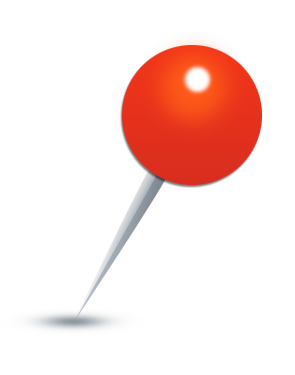
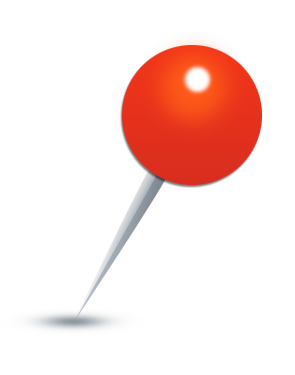
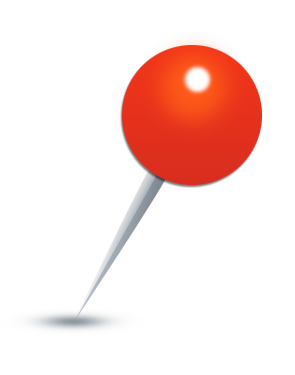
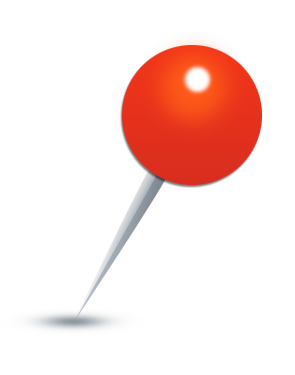
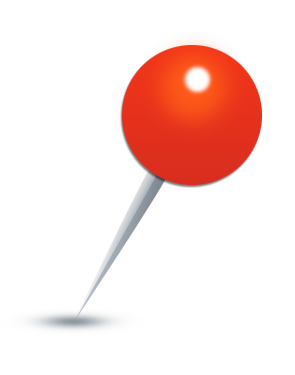
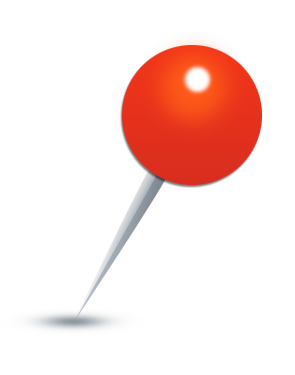
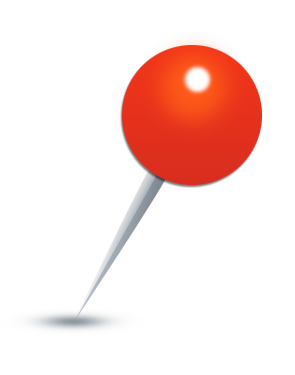
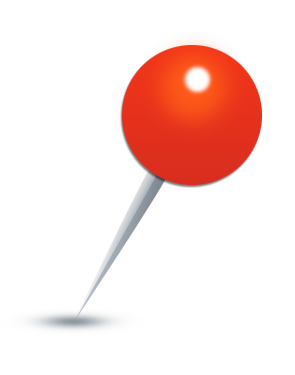
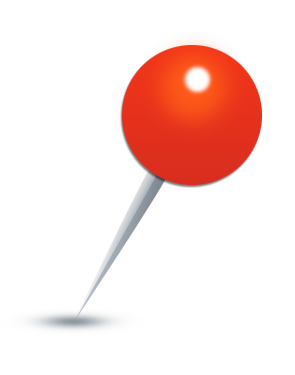
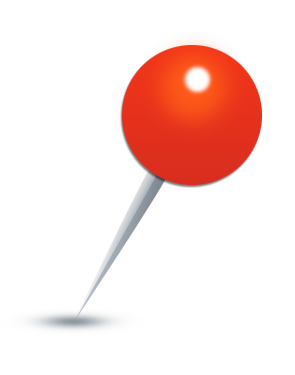
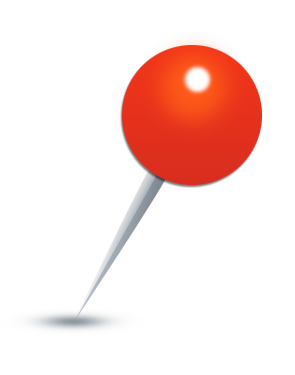
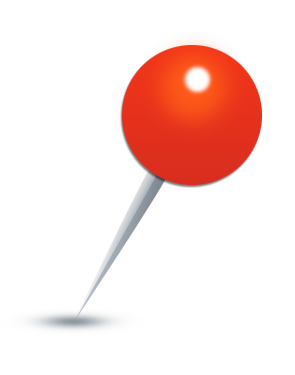
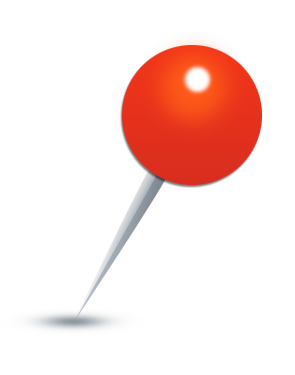
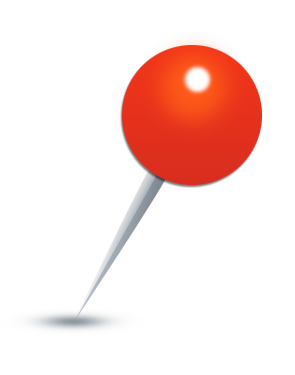
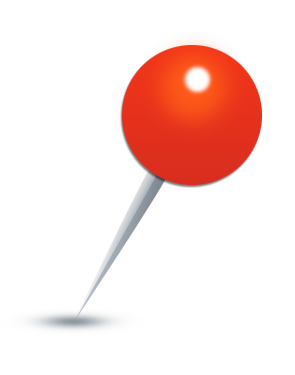
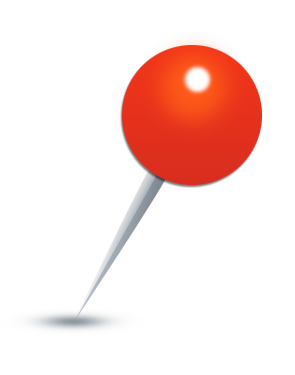
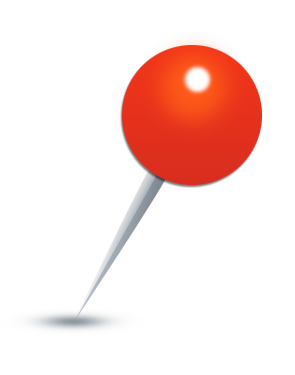
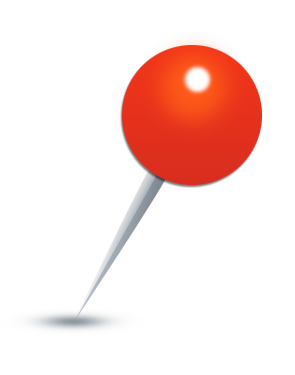
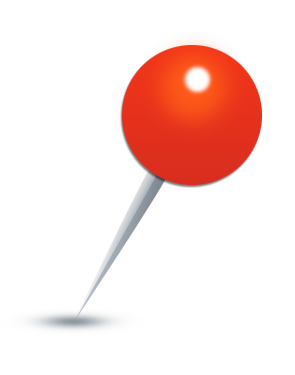
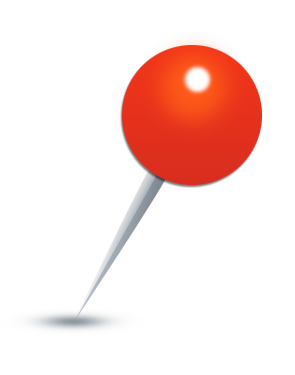
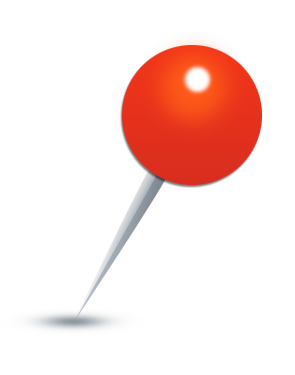
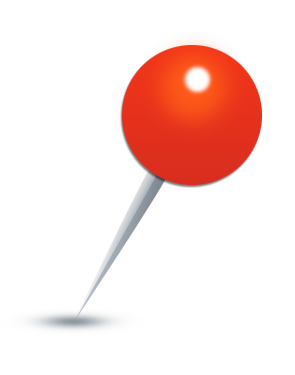
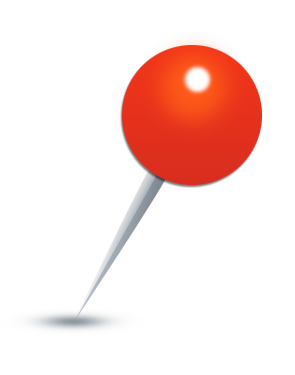
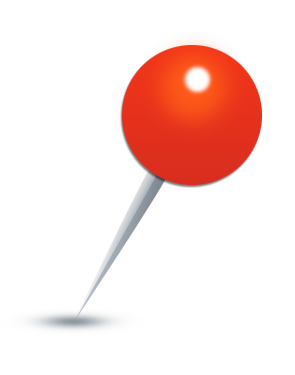
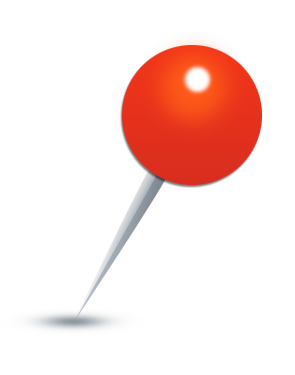
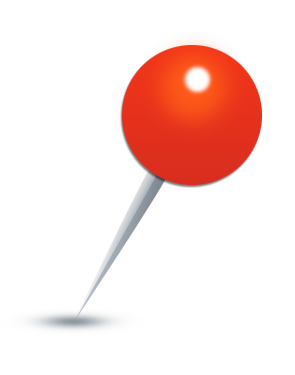
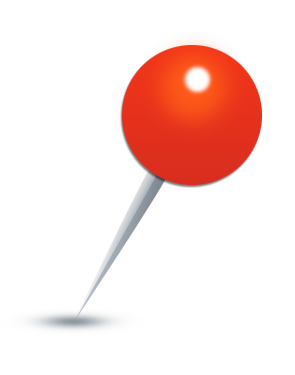
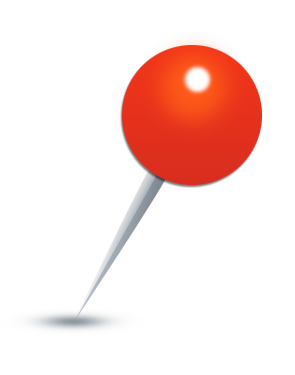
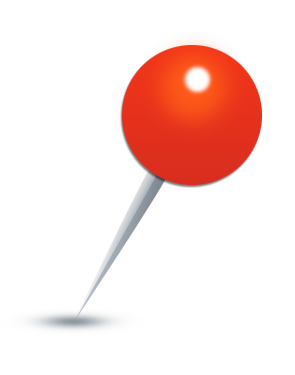
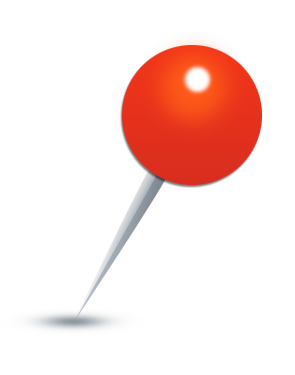
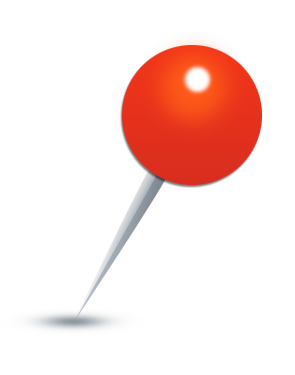
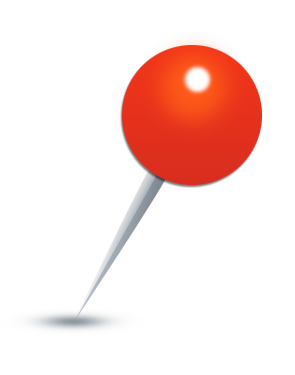
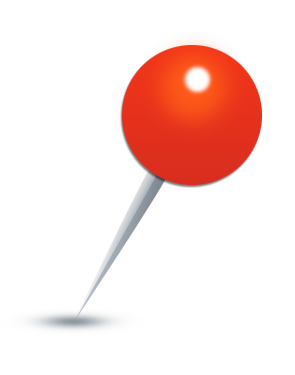
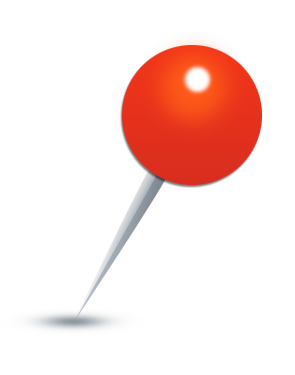
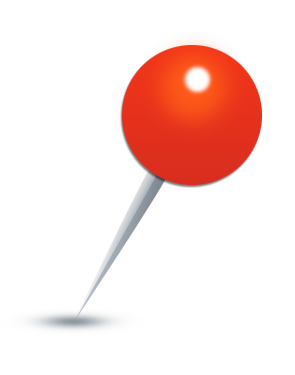
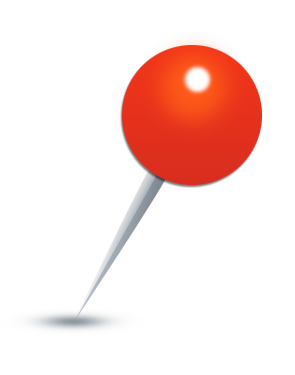
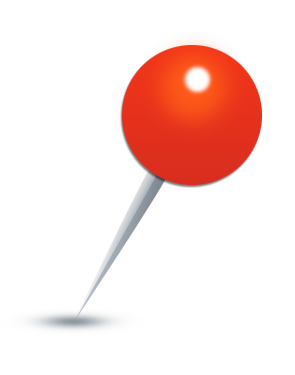
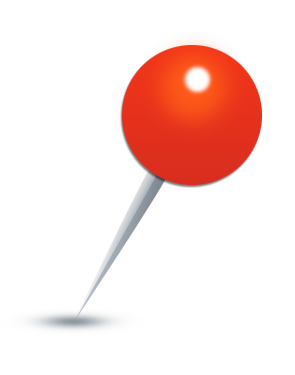
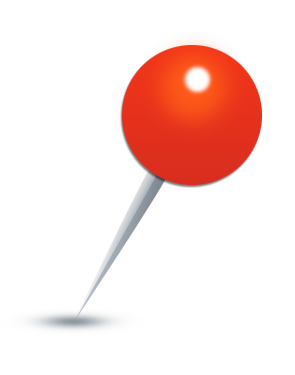
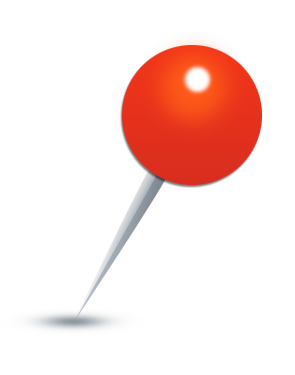
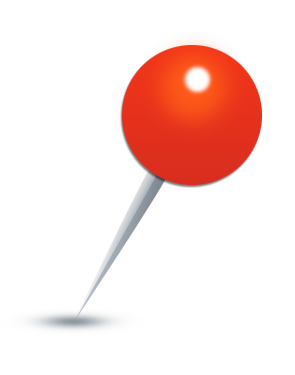
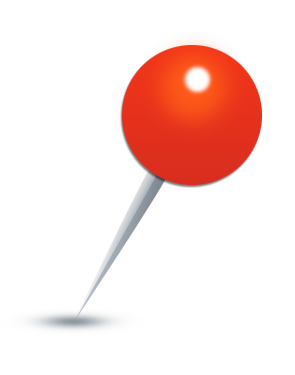
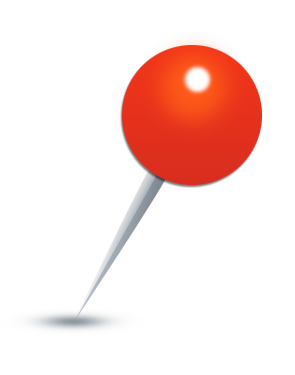
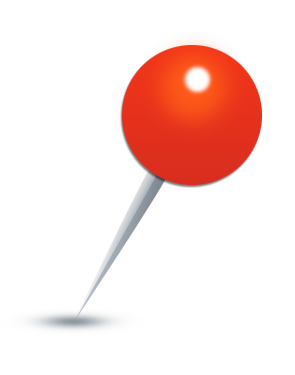
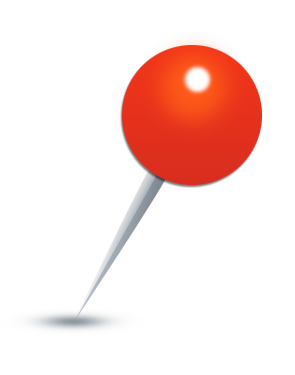
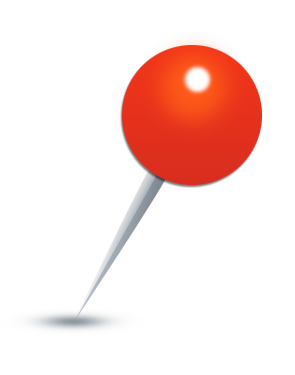
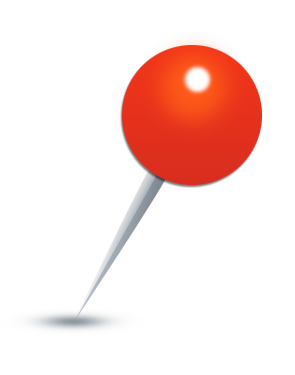
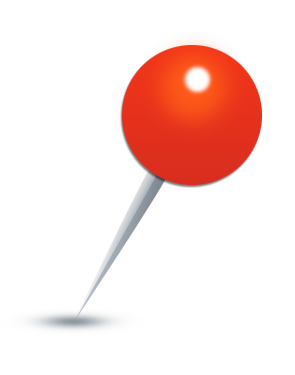
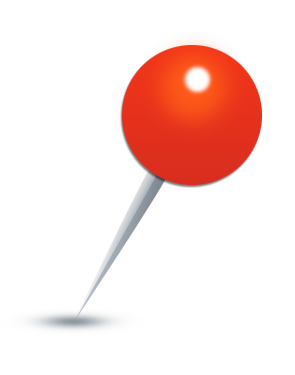
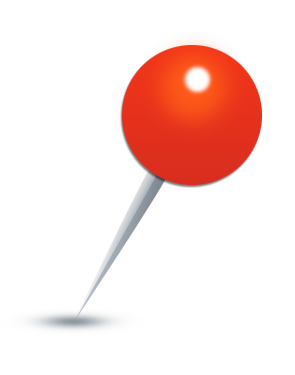
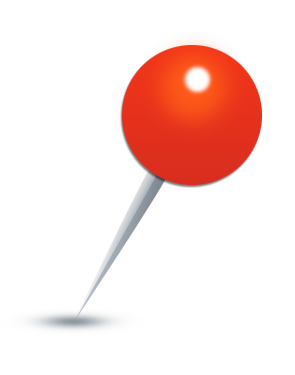
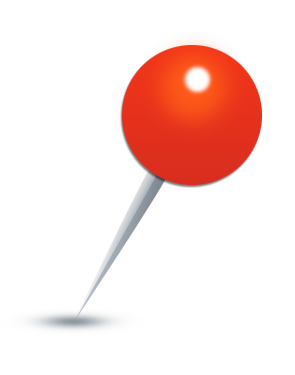
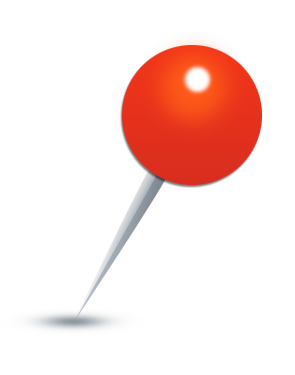
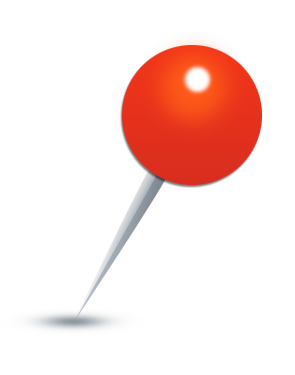
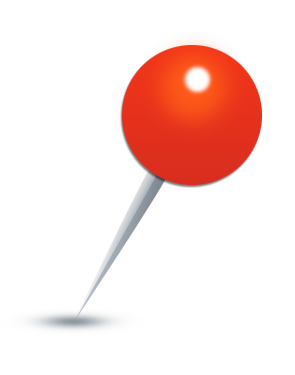
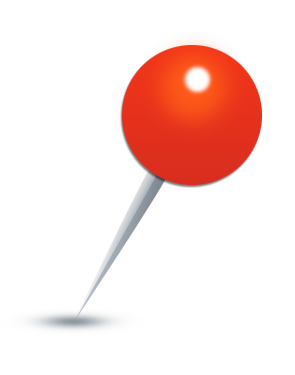
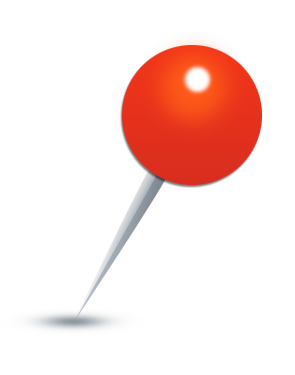
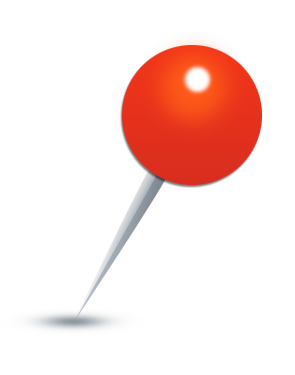
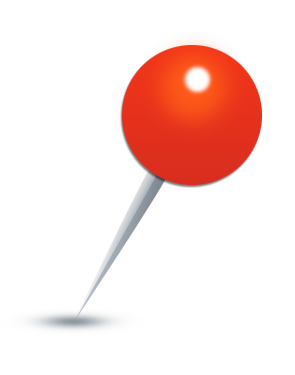
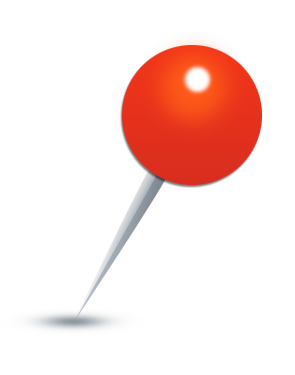
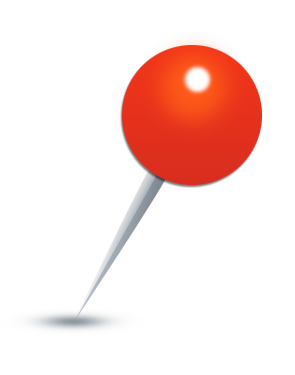
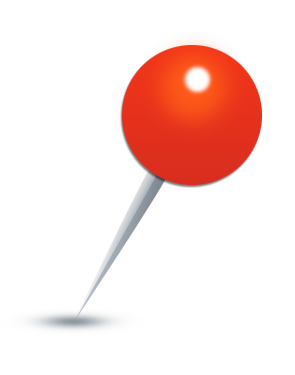
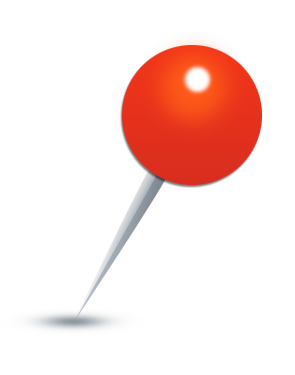
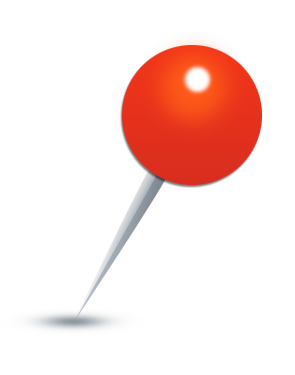
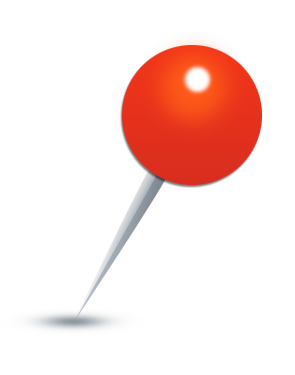
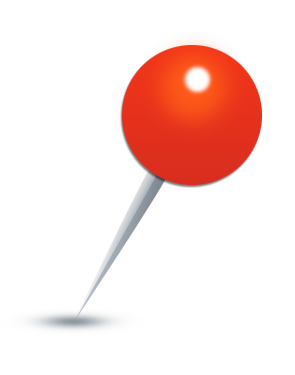
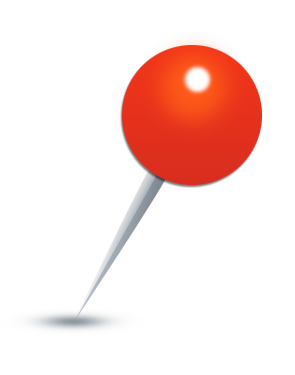
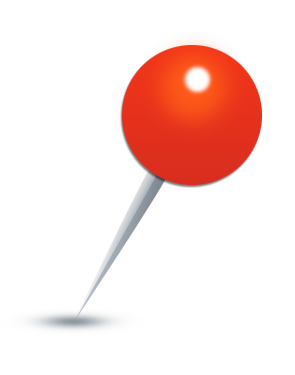
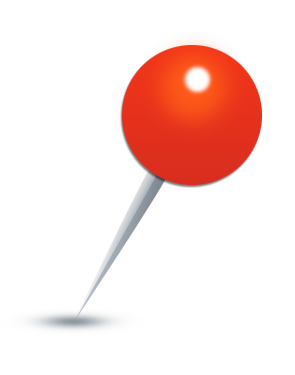
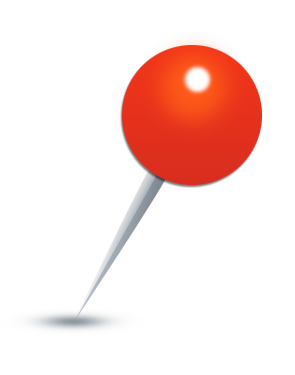
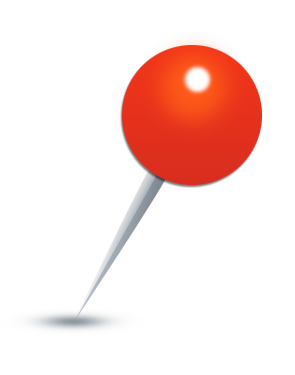
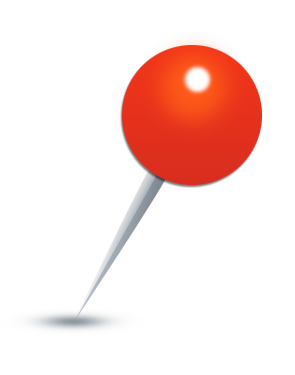
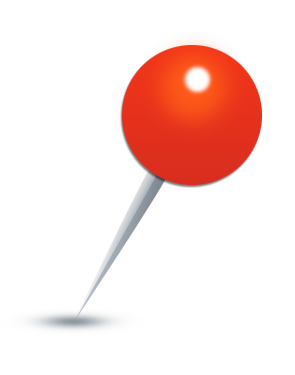
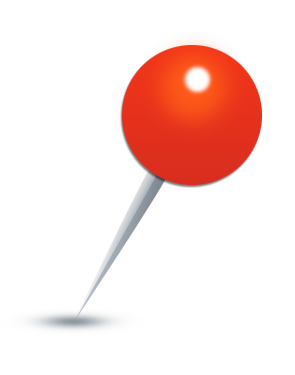
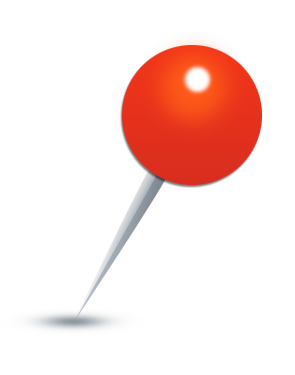
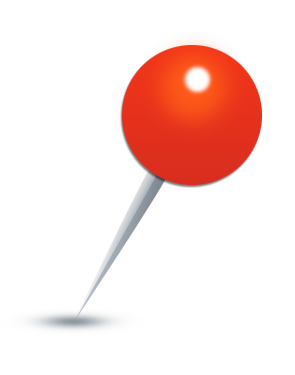
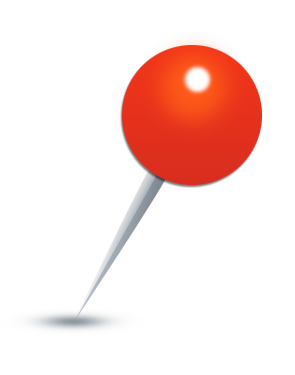
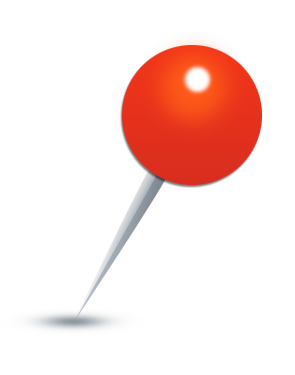
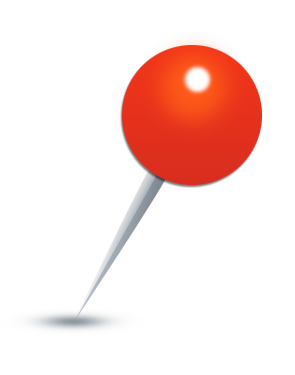
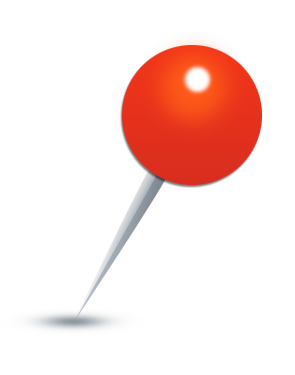
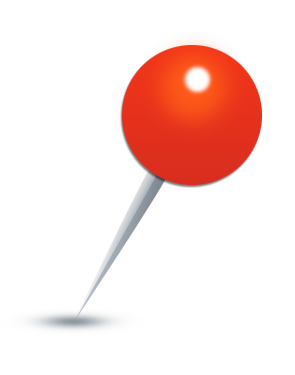
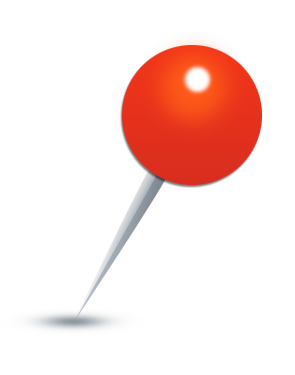
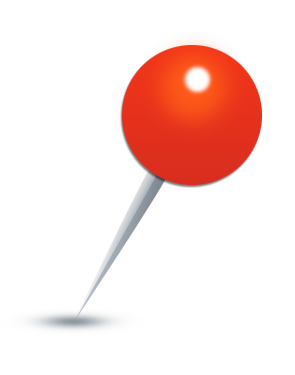
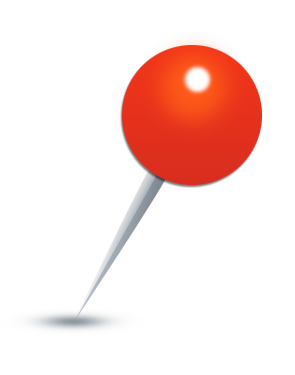
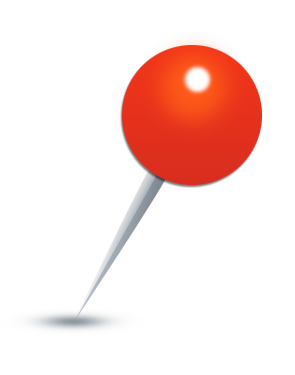
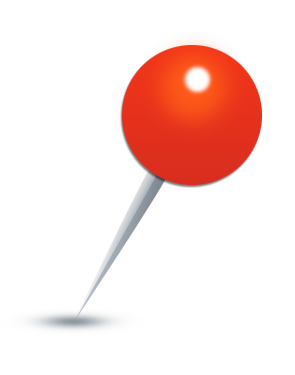
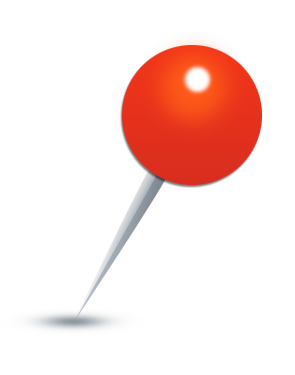
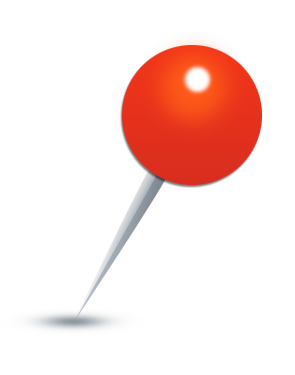
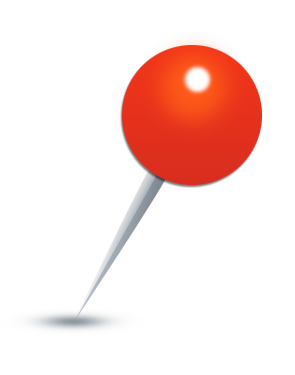
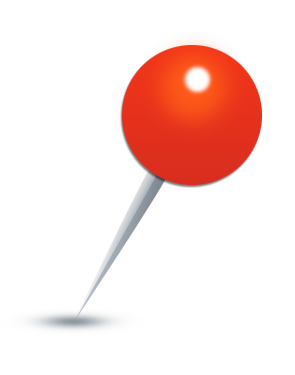
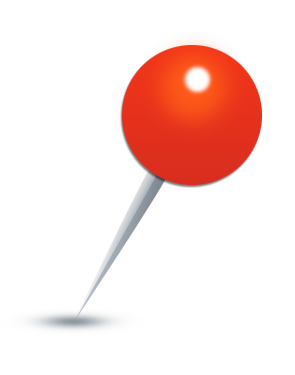
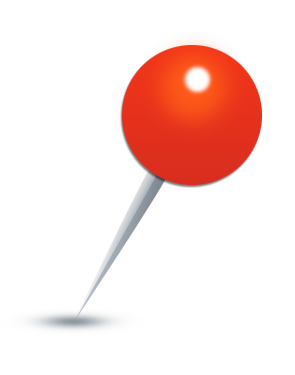
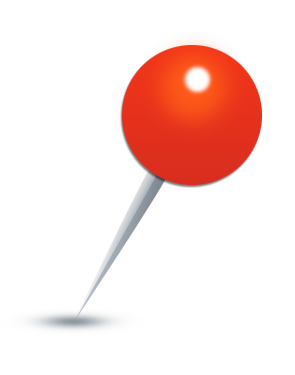
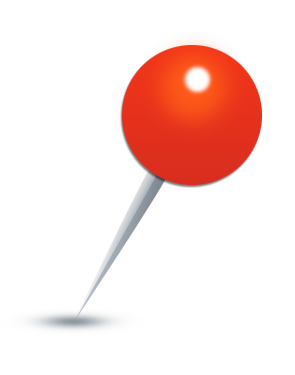
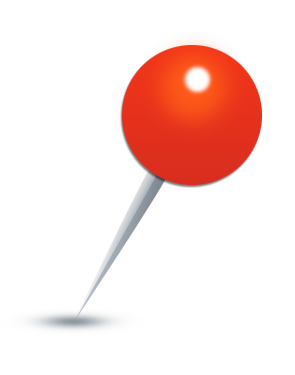
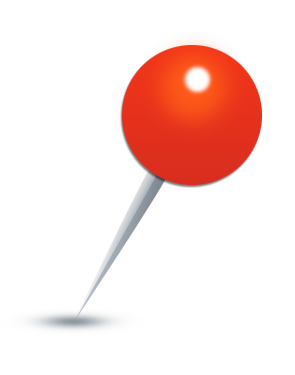
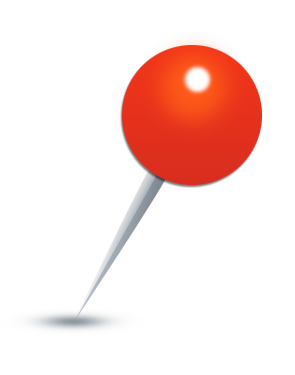
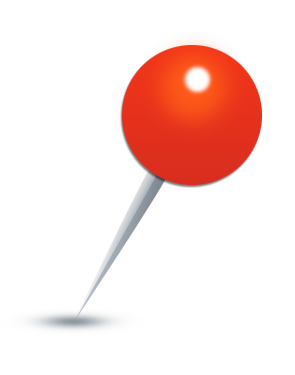
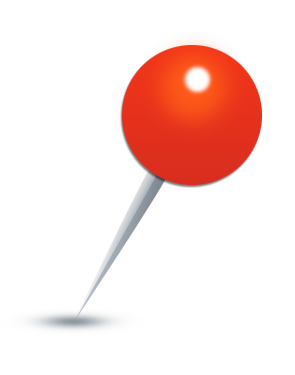
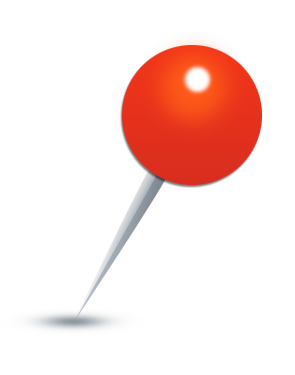
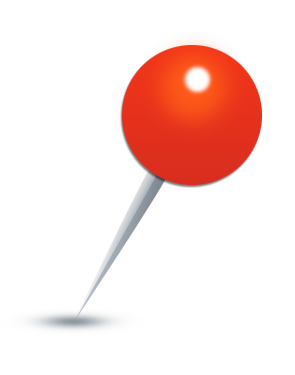
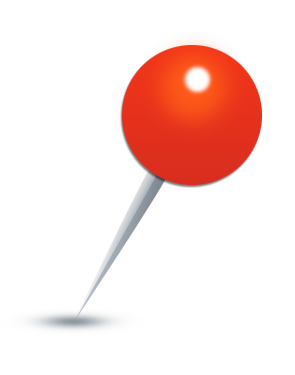
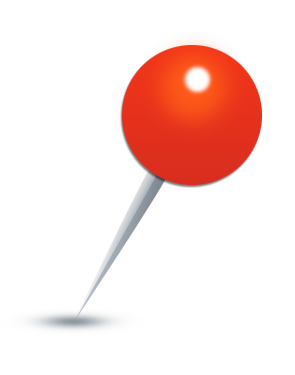
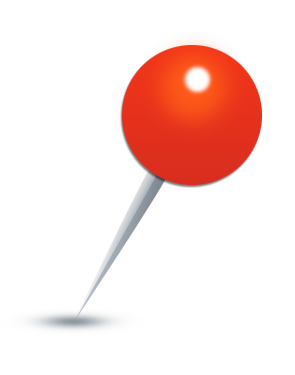
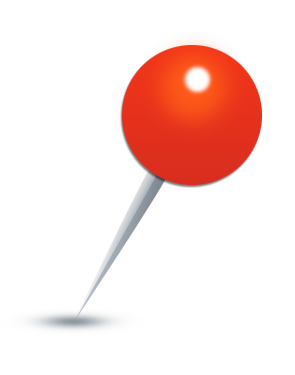
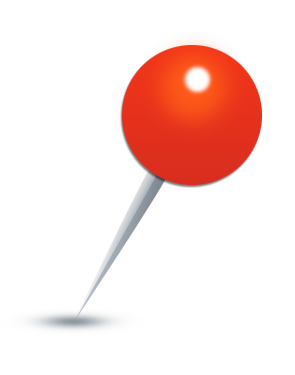
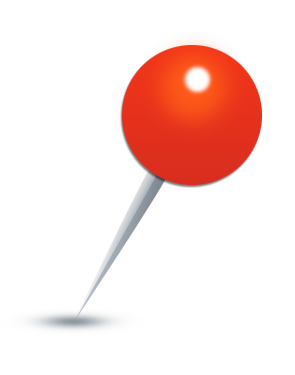
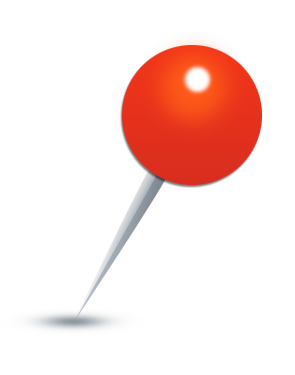
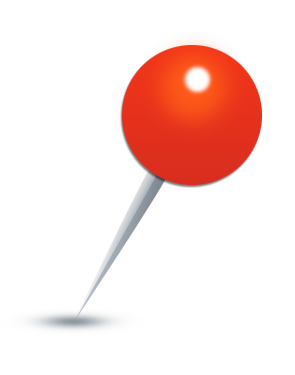
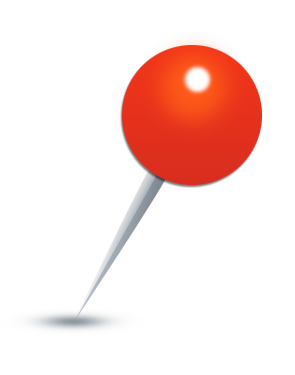
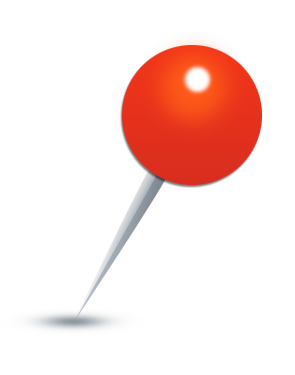
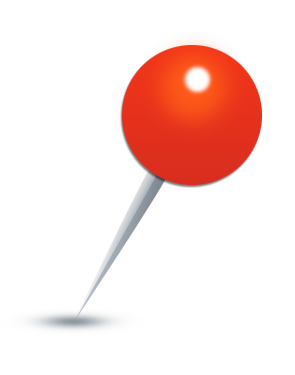
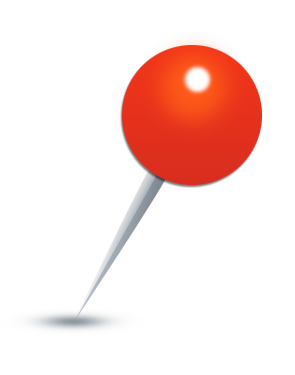
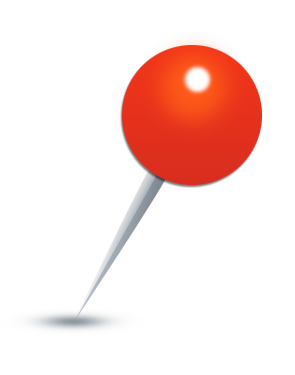
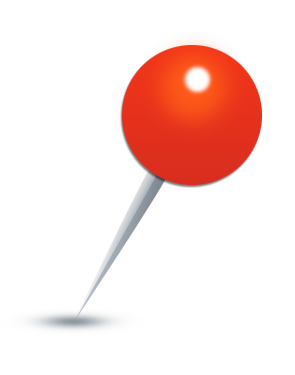
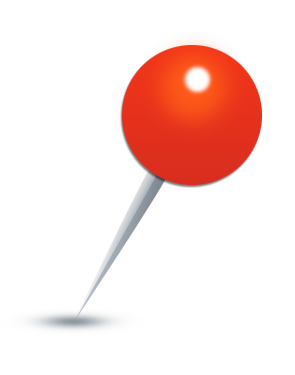
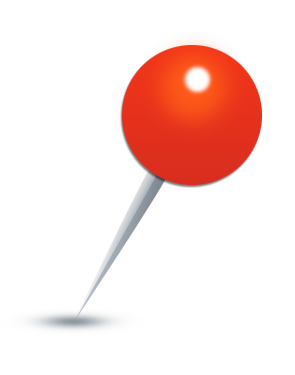
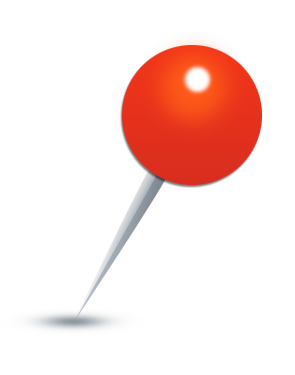
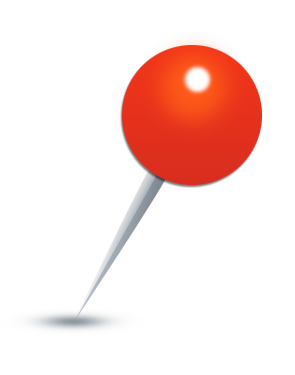
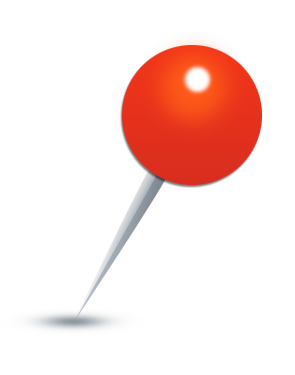
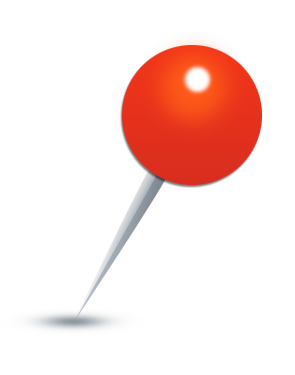
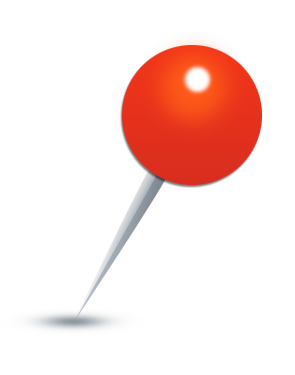
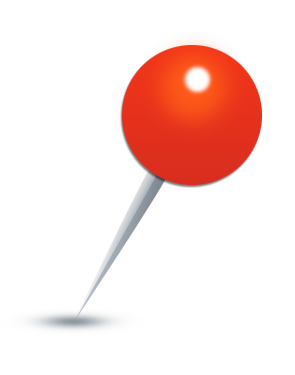
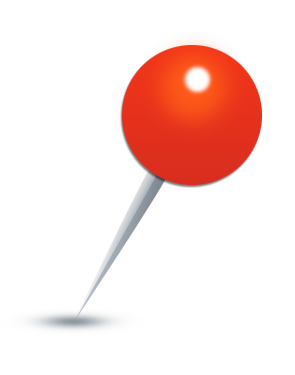
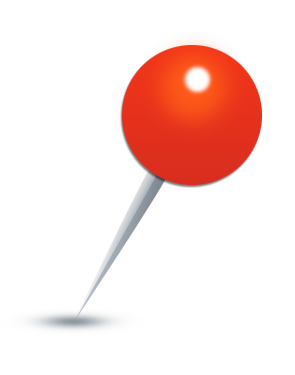
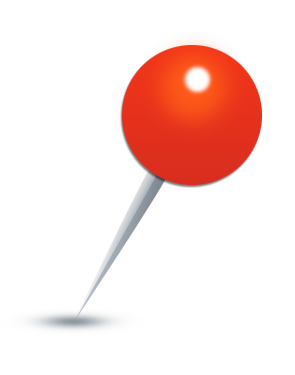
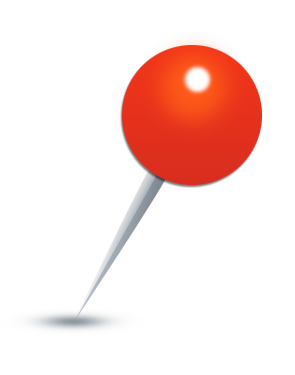
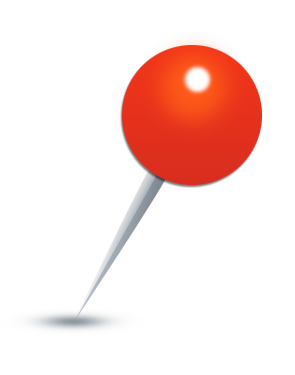
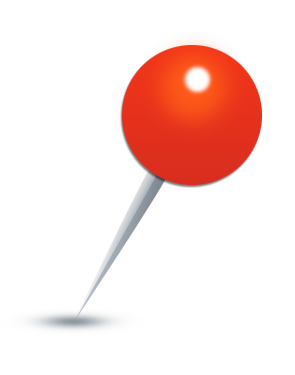
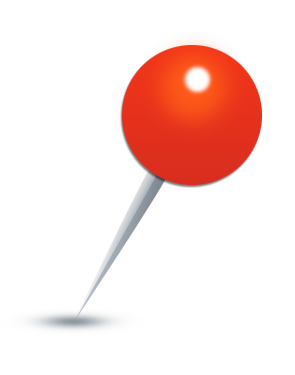
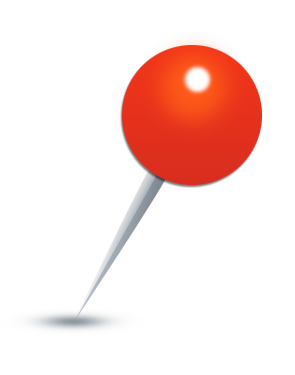
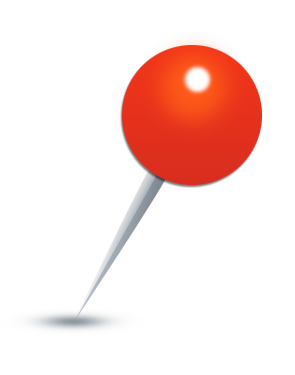
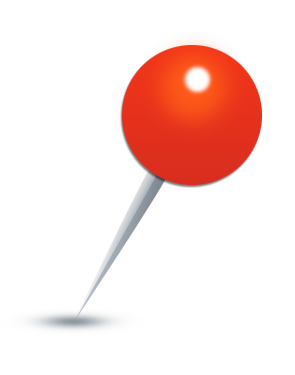
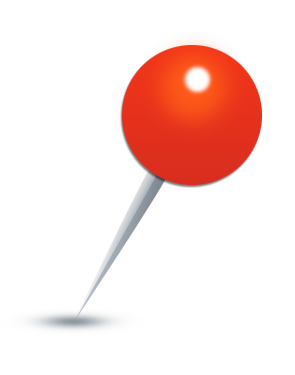
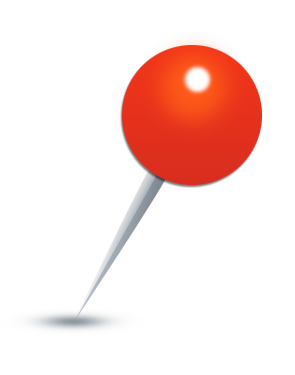
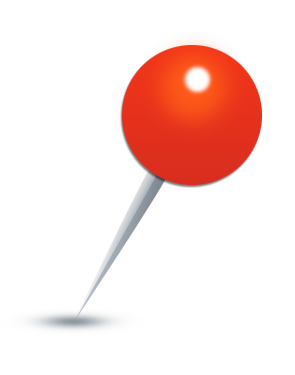
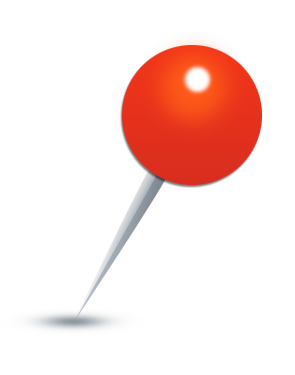
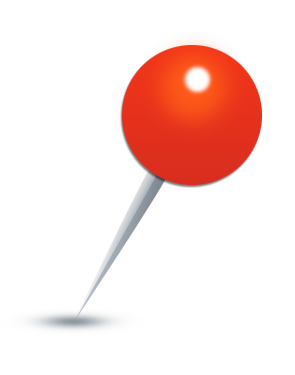
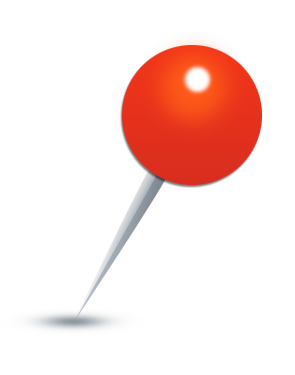
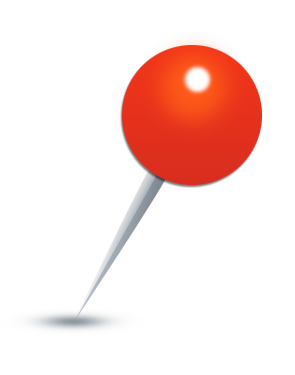
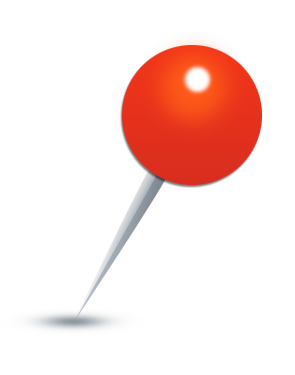
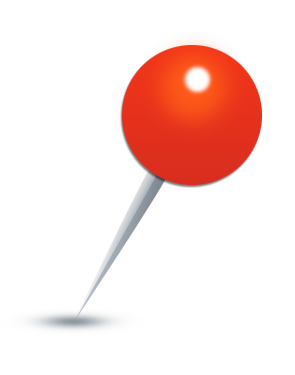
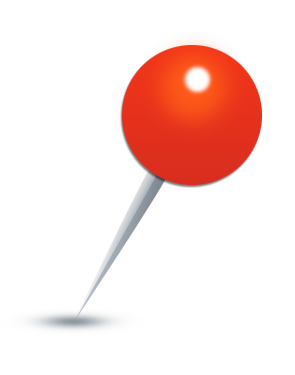
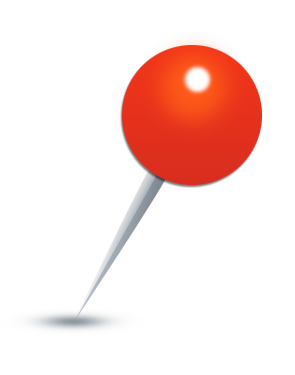
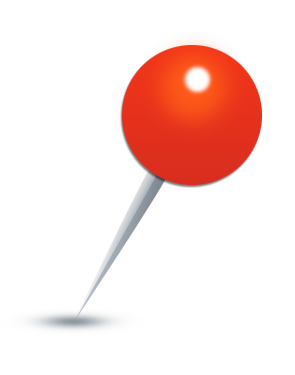
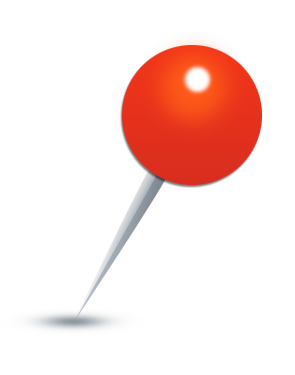
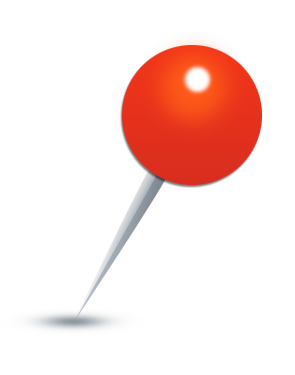
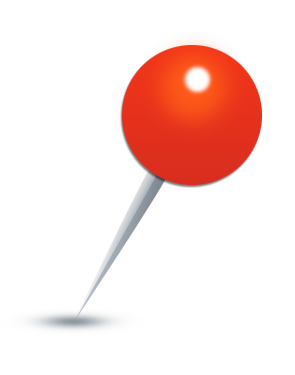
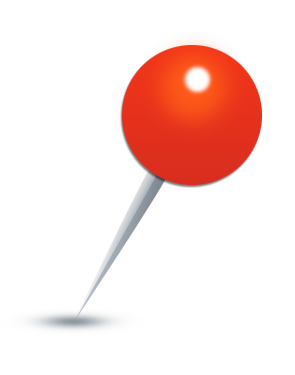
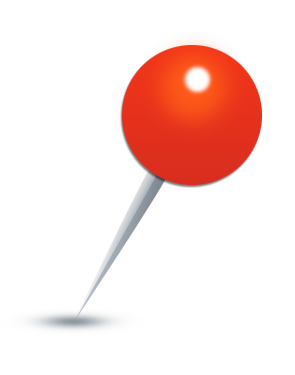
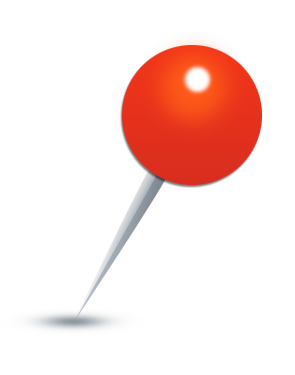
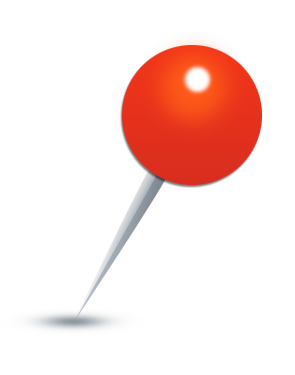
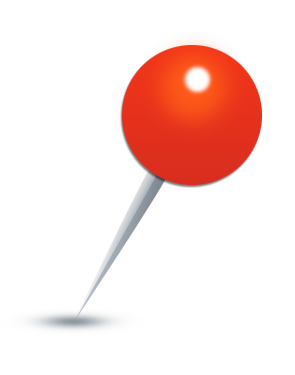
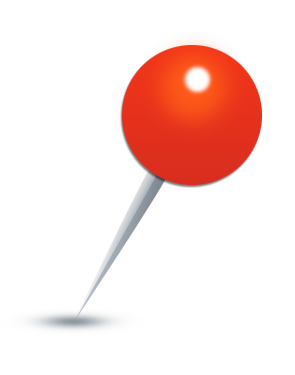
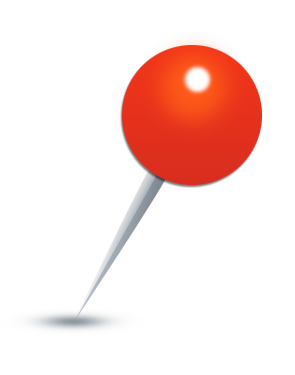
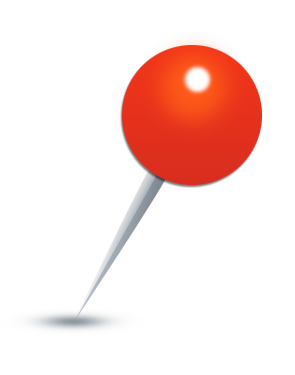
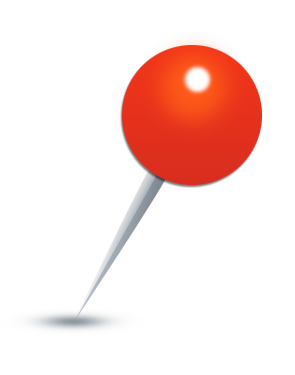
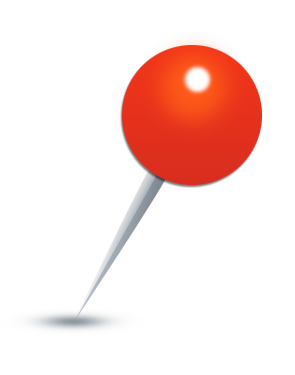

In [10]:
import folium
from branca.element import Figure

# Create a Figure object
fig = Figure(width=1024, height=600)

# Create a Folium Map object covering the whole world
fmap = folium.Map(location=[0, 0], tiles="openstreetmap", zoom_start=2)

# Filter out rows with NaN latitude or longitude
df_filtered = df.dropna(subset=['latitude', 'longitude'])

# Define the path to the custom icon
icon_path = '/Users/ulrike_imac_air/projects/DataScienceProjects/tech_layoffs_project/tech_layoffs_pictures/redsmallpin.png'  # Change this to the correct path to your icon file

# Iterate over each row in the filtered DataFrame
for index, row in df_filtered.iterrows():
    latitude, longitude = row['latitude'], row['longitude']
    name = row["location_HQ"] 
    
    # Create a custom icon
    icon = folium.CustomIcon(icon_image=icon_path, icon_size=(30, 30))  # Adjust icon_size as needed
    
    # Add marker to the map with the custom icon
    folium.Marker(location=[latitude, longitude], popup=name, icon=icon).add_to(fmap)

# Add the Folium Map object to the Figure
fig.add_child(fmap)

# Display the Figure
display(fig)


In [12]:
gr_cat = df[["Country",
             "location_HQ"]].groupby(["Country",
                                       "location_HQ"], as_index=False).size()

In [13]:
import plotly.express as px

fig = px.sunburst(gr_cat, width=1280, height=800,
                  path=["Country","location_HQ"], values="size",
                  color="Country",
                  title="<span style='font-size:18px;'><b>Locations of tech layoffs by location HQ and countries (cities in total number)</b></span><b></b>"
                  )
fig.update_layout(font_size=10, margin=dict(l=10, r=10, t=30, b=50))
fig.update_traces(textinfo="label+percent parent")
fig.show()

In [14]:
fig = px.treemap(gr_cat, width=1280, height=800,
                 path=["Country","location_HQ"], values='size',
                 color='Country')
fig.update_traces(textinfo="label+percent parent")
fig.show()